# EDA Assignment 1

In [20]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


1. What is the distribution of age among heart failure patients in the dataset

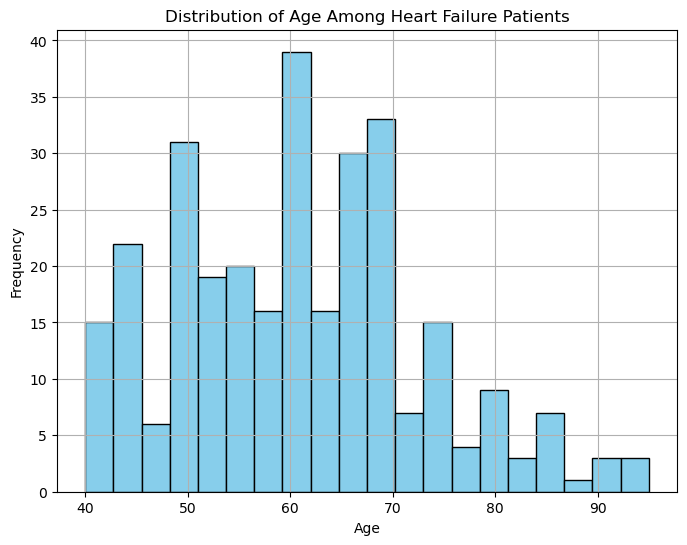

In [6]:
plt.figure(figsize=(8, 6))
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age Among Heart Failure Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

2. How does the death rate vary with age?

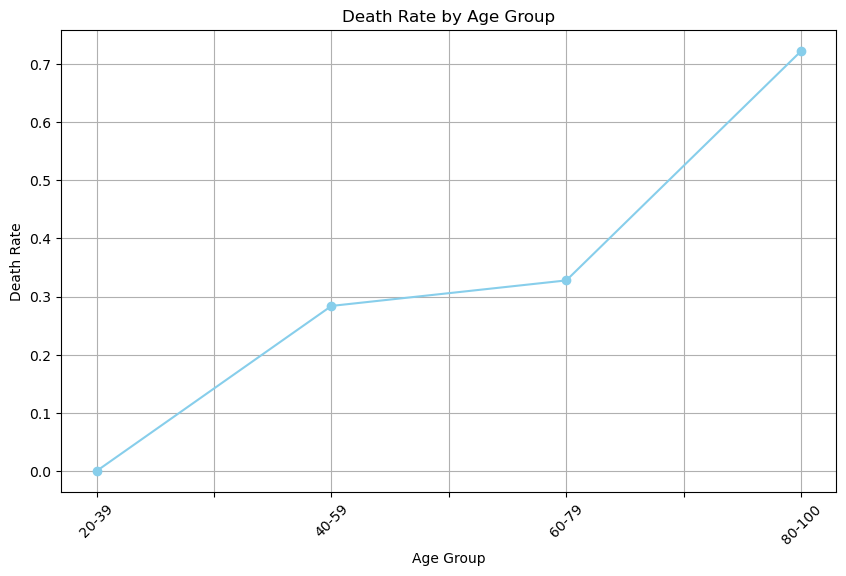

In [24]:
age_bins = [0, 20, 40, 60, 80, 100]
age_labels = ['0-19', '20-39', '40-59', '60-79', '80-100']

df['Age Group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)
death_rate_by_age = df.groupby('Age Group')['DEATH_EVENT'].mean()

plt.figure(figsize=(10, 6))
death_rate_by_age.plot(kind='line', marker='o', color='skyblue')
plt.title('Death Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Death Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

3. What is the percentage of male and female patients in the dataset?

In [8]:
gender_percentage = df['sex'].value_counts(normalize=True) * 100

# Displaying the results
print("Percentage of male patients:", gender_percentage[1])
print("Percentage of female patients:", gender_percentage[0])


Percentage of male patients: 64.88294314381271
Percentage of female patients: 35.11705685618729


4. How does the platelet count vary among different age groups?

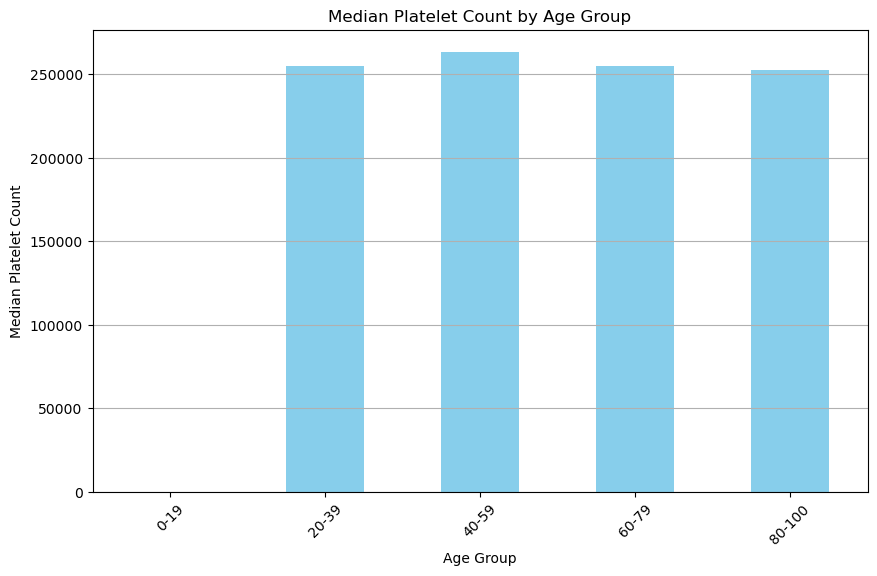

In [10]:
age_bins = [0, 20, 40, 60, 80, 100]
age_labels = ['0-19', '20-39', '40-59', '60-79', '80-100']

df['Age Group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)
platelet_by_age = df.groupby('Age Group')['platelets'].median()

# Plotting median platelet count by age group
plt.figure(figsize=(10, 6))
platelet_by_age.plot(kind='bar', color='skyblue')
plt.title('Median Platelet Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Platelet Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


5. Is there a correlation between creatinine  and sodium levels in the blood?

In [12]:
correlation = df['serum_creatinine'].corr(df['serum_sodium'])

print("Correlation coefficient between Serum Creatinine and Serum Sodium:", correlation)

Correlation coefficient between Serum Creatinine and Serum Sodium: -0.1890952100911741


6. How does the prevalence of high blood pressure differ between male and female patient?

In [15]:
high_bp_prevalence = df.groupby('sex')['high_blood_pressure'].mean()

# Displaying the results
print("Prevalence of high blood pressure among male patients:", high_bp_prevalence[1])
print("Prevalence of high blood pressure among female patients:", high_bp_prevalence[0])


Prevalence of high blood pressure among male patients: 0.31443298969072164
Prevalence of high blood pressure among female patients: 0.41904761904761906


7. What is the relationship between smoking habits and the occurance of heart failure?

In [17]:
heart_failure_by_smoking = df.groupby('smoking')['DEATH_EVENT'].mean()


print("Proportion of heart failure among non-smokers:", heart_failure_by_smoking[0])
print("Proportion of heart failure among smokers:", heart_failure_by_smoking[1])


Proportion of heart failure among non-smokers: 0.3251231527093596
Proportion of heart failure among smokers: 0.3125


8. Are there any noticable pattern in the distribution of death events accross different ae groups?

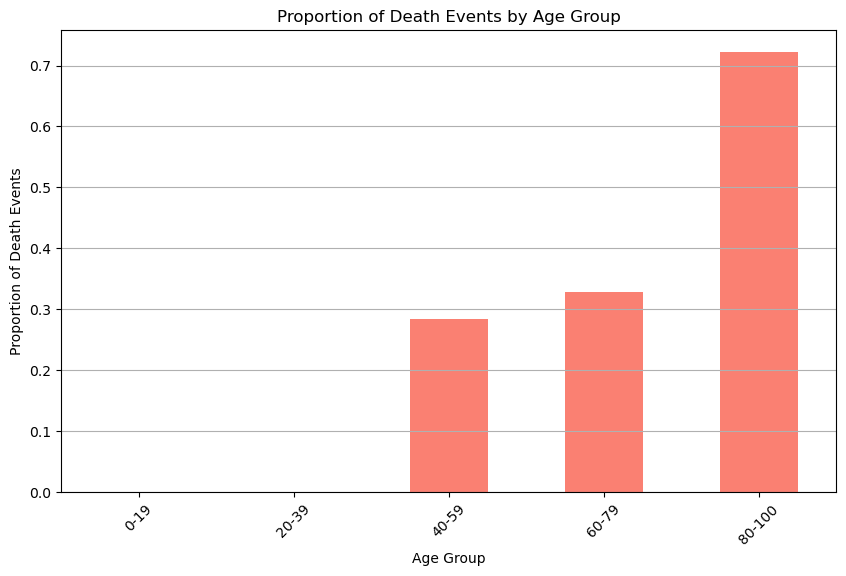

In [18]:
age_bins = [0, 20, 40, 60, 80, 100]
age_labels = ['0-19', '20-39', '40-59', '60-79', '80-100']

df['Age Group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)
death_events_by_age = df.groupby('Age Group')['DEATH_EVENT'].mean()

# Plotting the proportion of death events by age group
plt.figure(figsize=(10, 6))
death_events_by_age.plot(kind='bar', color='salmon')
plt.title('Proportion of Death Events by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion of Death Events')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

9. Is there any significant difference in ejection fraction between patients with or without diabetes?

In [21]:
ejection_fraction_diabetes = df[df['diabetes'] == 1]['ejection_fraction']
ejection_fraction_no_diabetes = df[df['diabetes'] == 0]['ejection_fraction']

# Perform a t-test for independent samples
t_stat, p_value = stats.ttest_ind(ejection_fraction_diabetes, ejection_fraction_no_diabetes, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)

u_stat, p_value_mannwhitney = stats.mannwhitneyu(ejection_fraction_diabetes, ejection_fraction_no_diabetes)

print("Mann-Whitney U statistic:", u_stat)
print("P-value (Mann-Whitney U):", p_value_mannwhitney)

T-statistic: -0.08472126448808373
P-value: 0.9325436826526667
Mann-Whitney U statistic: 10724.5
P-value (Mann-Whitney U): 0.8376930820736825


In [16]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT', 'Age Group'],
      dtype='object')

10. How does the serum creatinine level vary between patients who survived and those who did not?

Summary statistics for serum creatinine levels of patients who survived:
count    203.000000
mean       1.184877
std        0.654083
min        0.500000
25%        0.900000
50%        1.000000
75%        1.200000
max        6.100000
Name: serum_creatinine, dtype: float64

Summary statistics for serum creatinine levels of patients who did not survive:
count    96.000000
mean      1.835833
std       1.468562
min       0.600000
25%       1.075000
50%       1.300000
75%       1.900000
max       9.400000
Name: serum_creatinine, dtype: float64


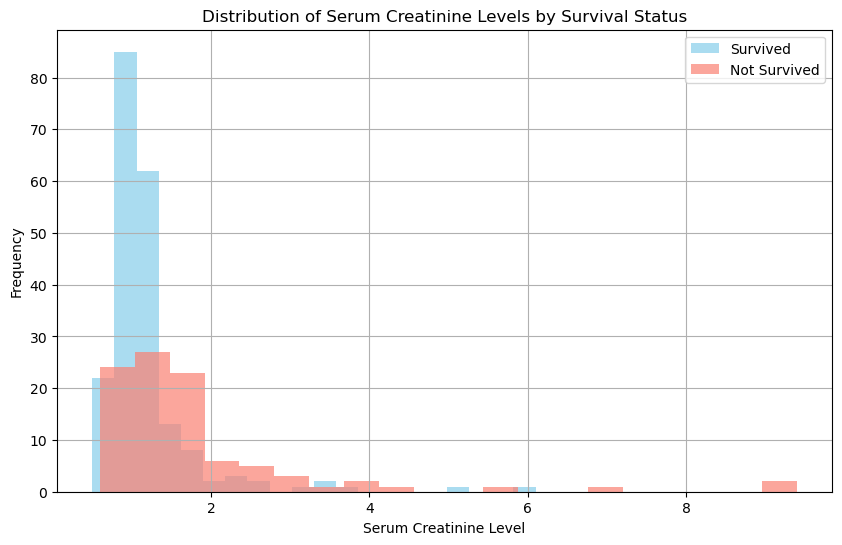

In [22]:
creatinine_survived = df[df['DEATH_EVENT'] == 0]['serum_creatinine']
creatinine_not_survived = df[df['DEATH_EVENT'] == 1]['serum_creatinine']

creatinine_survived_stats = creatinine_survived.describe()
creatinine_not_survived_stats = creatinine_not_survived.describe()

print("Summary statistics for serum creatinine levels of patients who survived:")
print(creatinine_survived_stats)
print("\nSummary statistics for serum creatinine levels of patients who did not survive:")
print(creatinine_not_survived_stats)

plt.figure(figsize=(10, 6))
plt.hist(creatinine_survived, bins=20, color='skyblue', alpha=0.7, label='Survived')
plt.hist(creatinine_not_survived, bins=20, color='salmon', alpha=0.7, label='Not Survived')
plt.title('Distribution of Serum Creatinine Levels by Survival Status')
plt.xlabel('Serum Creatinine Level')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


# Thank You !